# Unsupervised vs. Supervised Dimensionality Reduction

## **The Dataset**

In this example, we will utilize *CS:GO Professional Match Results*, which is a match stats and results of competitive e-sports game. Our classification label here is *map_won*, which explains the team won the round or not.

CS:GO competitive match consists of several maps on play. For example, in *best of 3* format, maximum of 3 maps will be played and the winner is decided by winning 2 maps. Here X and Y is a team-opponent stats.

In [13]:
# import modules
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
# pandas options
pd.set_option('display.float', '{:,.2f}'.format)
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_info_columns', 50)

# importing dataset
comb_agg_data = pd.read_csv('dataset\comb_agg_data.csv')
comb_agg_data.head().T

,0,1,2,3,4
match_url,https://www.hltv.org/matches/2338765/heroic-vs...,https://www.hltv.org/matches/2338765/heroic-vs...,https://www.hltv.org/matches/2338778/heroic-vs...,https://www.hltv.org/matches/2338778/heroic-vs...,https://www.hltv.org/matches/2338778/heroic-vs...
prize_pool,20000,20000,20000,20000,20000
teams_participated,10.00,10.00,10.00,10.00,10.00
map_won_x,True,True,True,True,True
team_rating_x,309.00,309.00,309.00,309.00,309.00
comb_team_kddiff_x,-8,37,30,24,21
comb_past_tot_kills_x,"4,166.00","4,467.00","3,458.00","3,435.00","1,178.00"
comb_past_tot_deaths_x,"3,826.00","4,057.00","3,251.00","3,173.00","1,015.00"
comb_past_net_kddiff_x,340.00,410.00,207.00,262.00,163.00
comb_past_kdr_x,1.09,1.10,1.06,1.08,1.16


## **Principal Component Analysis**

PCA is an unsupervised dimensionality reduction. The detail won't be elaborated in this analysis since many online resources are available in explaining this.

We will observe the first two principals component and identify for any significant pattern.

Text(0.5, 1.0, "PCA's First Two Principal Components, \n explained variance = 0.49")

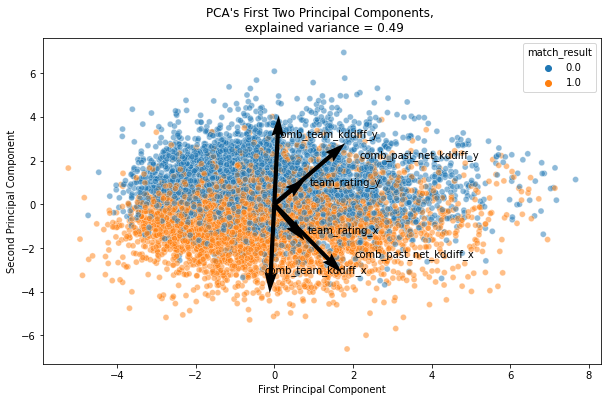

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# plotting
import matplotlib.pyplot as plt
import seaborn as sns

X = comb_agg_data.drop(
    columns=['match_url', 'map_won_x']
    )
y = comb_agg_data.map_won_x.values
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_scaled)
exp_variance_ratio = pca.explained_variance_ratio_
pc_1_loading_vector = pca.components_[0]
pc_2_loading_vector = pca.components_[1]
X_transfd = pca.transform(X_scaled)
plot_df = pd.DataFrame(
    np.c_[X_transfd, y.reshape(-1, 1)],
    columns=['z1', 'z2', 'match_result']
    )
# component loadings
variables = {
    'team_rating_x': np.argwhere(X.columns == 'team_rating_x')[0][0],
    'team_rating_y': np.argwhere(X.columns == 'team_rating_y')[0][0],
    'comb_team_kddiff_x': np.argwhere(X.columns == 'comb_team_kddiff_x')[0][0],
    'comb_team_kddiff_y': np.argwhere(X.columns == 'comb_team_kddiff_y')[0][0],
    'comb_past_net_kddiff_x': np.argwhere(X.columns == 'comb_past_net_kddiff_x')[0][0],
    'comb_past_net_kddiff_y': np.argwhere(X.columns == 'comb_past_net_kddiff_y')[0][0]
    }
# plot result
fig, ax= plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=plot_df, x='z1', y='z2', hue='match_result',
    alpha=0.5, ax=ax
    )
scale_x =  np.ptp(plot_df.z1.values)
scale_y = np.ptp(plot_df.z2.values)
for variable, index in variables.items():
    U = pc_1_loading_vector[index] * scale_x * 0.5
    V = pc_2_loading_vector[index] * scale_y * 0.5
    offset = 0.1 * V
    ax.quiver(
        0, 0, U, V, units='xy', scale=1
        )
    ax.text(
        U - 0.1, V + offset, s=variable 
        )
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title(f'PCA\'s First Two Principal Components, \n explained variance = {np.sum(exp_variance_ratio):.2f}')
plt.show()

We can observe decision boundary with the first two components. `comb_team_kddiff` is an important variable that can identify if corresponding teams is lose or win.

In *CS:GO*, each maps will be played in maximum of 30 rounds. A team will win the maps if the teams won 16 rounds. Most of the time, the team wil win the round by eliminating all of the opponent players. `kddiff` here explains kill-death score difference after the match finished. That is why, team with more positive kddiff mostly won the maps, and PCA can notice the importance of this variable.

## **Neighbourhood Component Analysis**

Now let's take a look at *NCA*. This is a supervised dimensionality reduction method, which involves using label for the dimensionality reduction algorithm.

Text(0.5, 1.0, "NCA's First Two Components")

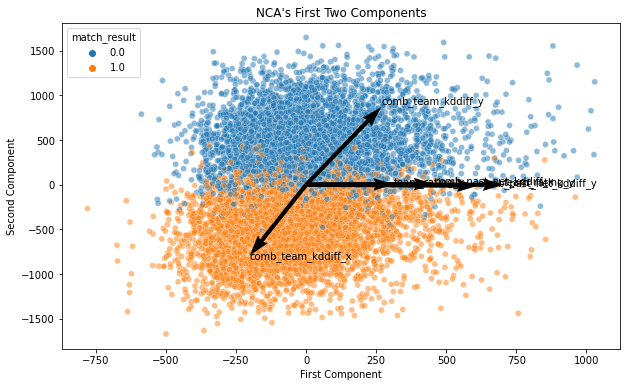

In [11]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# nca
nca = NeighborhoodComponentsAnalysis(n_components=2)
nca.fit(X_scaled, y)
X_transfd = nca.transform(X_scaled)
plot_df = pd.DataFrame(
    np.c_[X_transfd, y.reshape(-1, 1)],
    columns=['z1', 'z2', 'match_result']
    )
# component loadings
variables = {
    'team_rating_x': np.argwhere(X.columns == 'team_rating_x')[0][0],
    'team_rating_y': np.argwhere(X.columns == 'team_rating_y')[0][0],
    'comb_team_kddiff_x': np.argwhere(X.columns == 'comb_team_kddiff_x')[0][0],
    'comb_team_kddiff_y': np.argwhere(X.columns == 'comb_team_kddiff_y')[0][0],
    'comb_past_net_kddiff_x': np.argwhere(X.columns == 'comb_past_net_kddiff_x')[0][0],
    'comb_past_net_kddiff_y': np.argwhere(X.columns == 'comb_past_net_kddiff_y')[0][0]
    }
# plot result
fig, ax= plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=plot_df, x='z1', y='z2', hue='match_result',
    alpha=0.5, ax=ax
    )
scale_x =  np.ptp(plot_df.z1.values) / np.ptp(nca.components_[0])
scale_y = np.ptp(plot_df.z2.values) /  np.ptp(nca.components_[1])
for variable, index in variables.items():

    U = nca.components_[0][index] * scale_x * 0.5
    V = nca.components_[1][index] * scale_y * 0.5
    offset = 0.05 * V
    ax.quiver(
        0, 0, U, V, scale=1, angles='xy', scale_units='xy'
        )
    ax.text(
        U - 0.1, V + offset, s=variable 
        )
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_title('NCA\'s First Two Components')
plt.show()

The decision boundary is obviously more clearer in the supervised dimensionality reduction. This is why NCA is best used with KNN classification.